<a href="https://colab.research.google.com/github/Tom-Jung/testttttt/blob/main/Network_with_Map_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
pip install basemap

In [89]:
pos['경기도']

(127.17993725703357, 37.53346277135392)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-90-927b5e3b5bbe>:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-90-927b5e3b5bbe>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


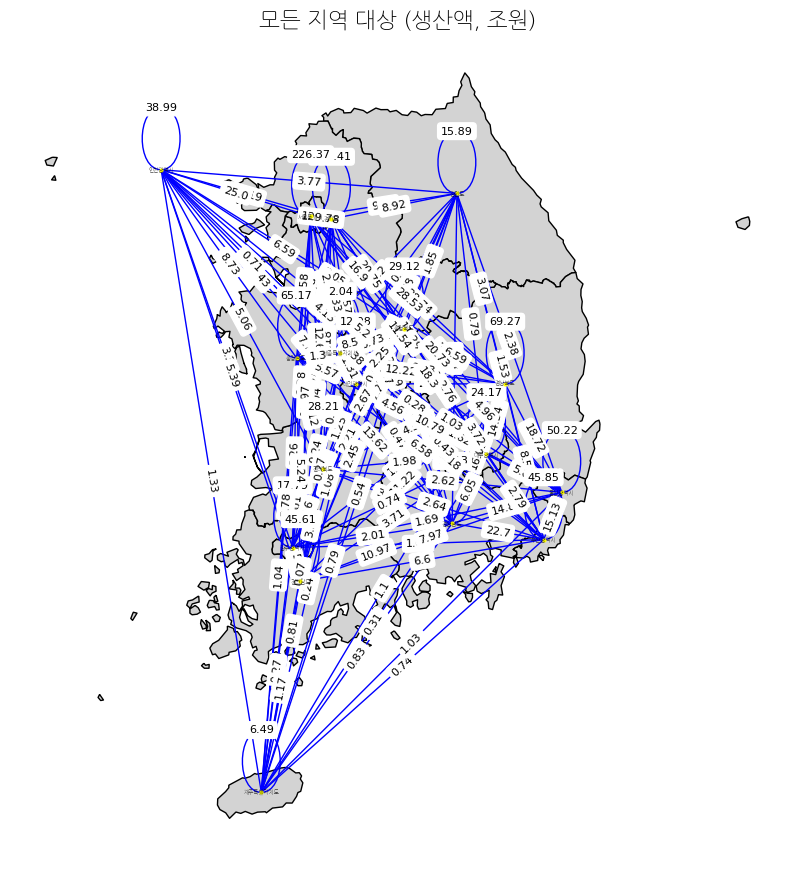

In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

!apt-get -y install fonts-nanum
!apt-get install fonts-nanum* -qq

# 설치된 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

# from matplotlib import rc
# font_name = fm.FontProperties(fname="/content/GILSANUB.TTF").get_name()
# rc('font', family=font_name)

# 설치된 폰트 확인
# font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
# font_list

rcParams['font.family'] = 'NanumGothicBold'

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'}) #폰트설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name = '조원')
adj_matrix = Hem.iloc[:,1:]
adj_matrix

regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.Graph()

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선에 숫자(가중치) 추가
# edges = [
#     ("서울특별시", "인천광역시", {"weight": 10}),
#     ("서울특별시", "경기도", {"weight": 5}),
#     ("부산광역시", "울산광역시", {"weight": 3}),
#     ("대구광역시", "경상북도", {"weight": 8}),
#     ("광주광역시", "전라남도", {"weight": 6}),
#     ("세종특별자치시", "충청북도", {"weight": 7}),
#     ("세종특별자치시", "충청남도", {"weight": 4}),
#     ("경기도", "강원도", {"weight": 9}),
#     ("경기도", "충청북도", {"weight": 6}),
#     ("강원도", "경상북도", {"weight": 2}),
#     ("전라북도", "전라남도", {"weight": 5}),
#     ("전라북도", "충청남도", {"weight": 7}),
#     ("제주특별자치도", "전라남도", {"weight": 1}),
#     ("인천광역시", "경기도", {"weight": 6}),
#     ("울산광역시", "경상남도", {"weight": 9}),
#     ("경상남도", "부산광역시", {"weight": 8}),
#     ("경상북도", "강원도", {"weight": 4})
# ]



# 간선 추가 (가중치 포함)
# G.add_edges_from(edges)

for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight =adj_matrix.iloc[j, i].round(2)
        if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
            G.add_edge(source, target, weight=weight)


# 3단계: '서울특별시'와 연결된 노드 및 간선만 유지
# sub_edges = [
#     (u, v, d) for u, v, d in G.edges(data=True)
#     if u == '서울특별시' or v == '서울특별시'
# ]

# '서울특별시'와 연결된 노드 추출
# connected_nodes = set([u for u, v, d in sub_edges] + [v for u, v, d in sub_edges])

# 새로운 서브 그래프 생성
# subG = G.subgraph(connected_nodes).copy()

# 3단계: 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10


# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")
pos['경기도'] = (127.179937, 37.233463)
pos = nx.get_node_attributes(G, 'pos')
# 간선 가중치를 기반으로 시각화하기
edge_weights = nx.get_edge_attributes(G, 'weight')

# 간선의 두께를 가중치에 따라 설정

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=4,
    node_color="yellow",
    edge_color="blue",
    font_size=4,
    font_family='NanumGothicBold',
    font_color="black",
    arrowsize=4,  # 화살표 크기 설정
    # width=edges_thickness  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("모든 지역 대상 (생산액, 조원)", fontsize=16)

# 저장
plt.savefig("/content/전_지역.pdf", dpi=300, bbox_inches='tight')

# 시각화
plt.show()


<ipython-input-91-db3eb7de5464>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-91-db3eb7de5464>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


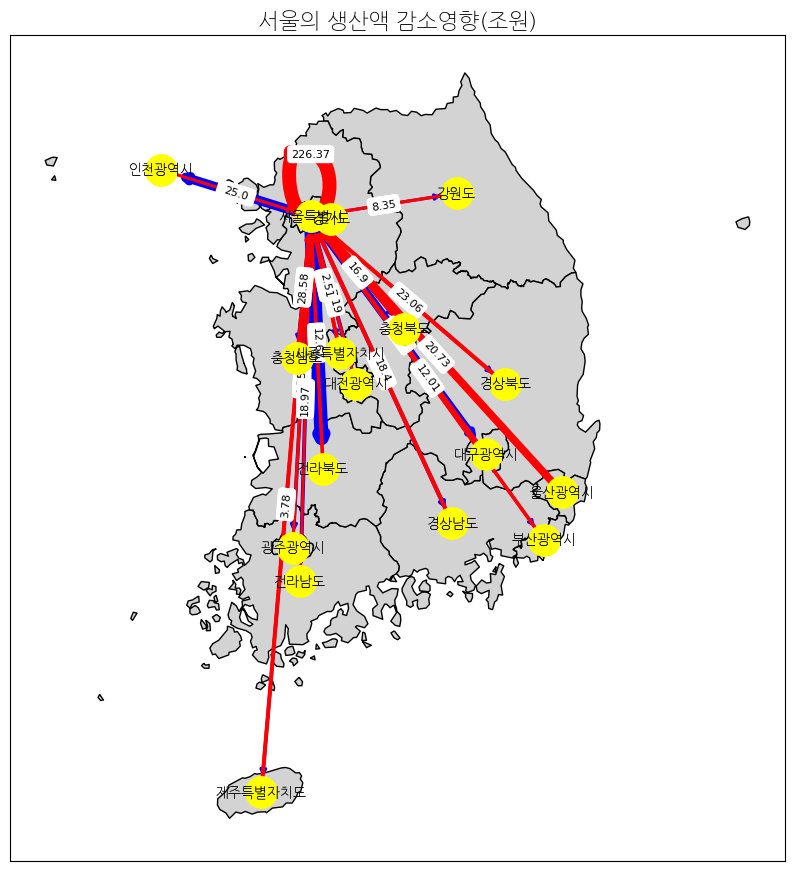

In [91]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold')  # 폰트 경로 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})  # 폰트 설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name='조원')
adj_matrix = Hem.iloc[:, 1:]
regions = adj_matrix.columns

# NetworkX 그래프 생성 (방향 그래프)
G = nx.DiGraph()  # DiGraph로 설정하여 방향성 간선 지원

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (서울에서 다른 지역으로, 다른 지역에서 서울로)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix.iloc[j, i].round(2)
        if weight > 0:
            if source == "서울특별시":  # 서울에서 다른 지역으로
                G.add_edge(source, target, weight=weight)
            elif target == "서울특별시":  # 다른 지역에서 서울로
                G.add_edge(source, target, weight=weight)

# 간선 두께 설정 (가중치 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 1. 서울에서 다른 지역으로 가는 간선 그리기
out_edges = [(source, target) for source, target in G.edges() if source == "서울특별시"]
nx.draw_networkx(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=500,
    node_color="yellow",
    edge_color="blue",
    font_size=10,
    font_family='NanumGothicBold',
    font_color="black",
    arrows=True,  # 화살표를 사용하여 방향 표시
    arrowsize=8,  # 화살표 크기 설정
    width=edge_widths,  # 가중치에 따른 간선 두께 설정
    edgelist=out_edges  # 서울에서 다른 지역으로 가는 간선만 그리기
)

# 2. 다른 지역에서 서울로 가는 간선 그리기
in_edges = [(source, target) for source, target in G.edges() if target == "서울특별시"]
nx.draw_networkx(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=500,
    node_color="yellow",
    edge_color="red",  # 다른 색으로 구분
    font_size=10,
    font_family='NanumGothicBold',
    font_color="black",
    arrows=True,  # 화살표를 사용하여 방향 표시
    arrowsize=8,  # 화살표 크기 설정
    width=edge_widths,  # 가중치에 따른 간선 두께 설정
    edgelist=in_edges  # 다른 지역에서 서울로 가는 간선만 그리기
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("서울의 생산액 감소영향(조원)", fontsize=16)

# 저장
plt.savefig("/content/서울지역.pdf", dpi=300, bbox_inches='tight')

# 시각화
plt.show()


<ipython-input-97-5128aec4be8d>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-97-5128aec4be8d>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


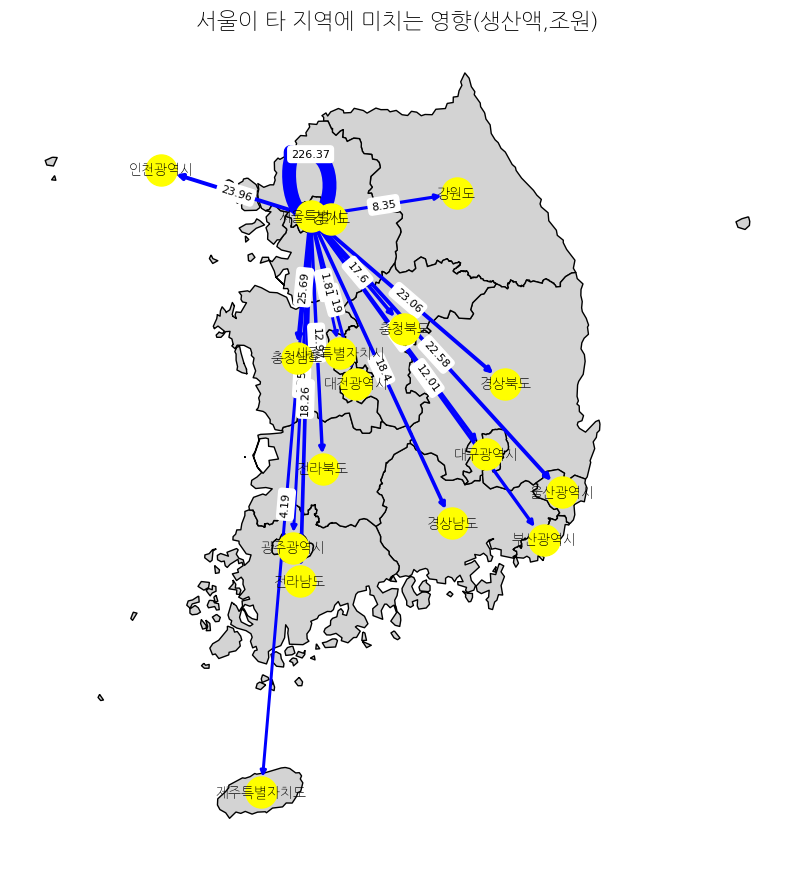

In [97]:
############################from Seoul to other regions #####################################
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold')  # 폰트 경로 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})  # 폰트 설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name='조원')
adj_matrix = Hem.iloc[:, 1:]
regions = adj_matrix.columns

# NetworkX 그래프 생성 (양방향 그래프)
G = nx.DiGraph()  # DiGraph에서 Graph로 변경하여 양방향 간선 지원

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (가중치 포함)
# 간선 추가 (방향 설정: 서울에서 다른 지역, 다른 지역에서 서울)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix.iloc[j, i].round(2)
        if weight > 0:
          # print(weight)
          if source == "서울특별시":  # 서울에서 다른 지역으로
                G.add_edge(source, target, weight=weight)
            # if target == "서울특별시":  # 다른 지역에서 서울로
                # G.add_edge(source, target, weight=weight)

# for i, target in enumerate(regions):
#     for j, source in enumerate(regions):
#       weight = adj_matrix.iloc[i, j].round(2)
#       if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
#         G.add_edge(source, target, weight=weight)

# 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=500,
    node_color="yellow",
    edge_color="blue",
    font_size=10,
    font_family='NanumGothicBold',
    font_color="black",
    arrows = True,
    arrowsize=8,  # 화살표 크기 설정
    width=edge_widths,  # 가중치에 따른 간선 두께 설정
    connectionstyle = 'arc3,rad=0'
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("서울이 타 지역에 미치는 영향(생산액,조원)", fontsize=16)

# 저장
plt.savefig("/content/서울이 타지역에 미치는 영향.pdf", dpi=300, bbox_inches='tight')

# 시각화
plt.show()

<ipython-input-100-5f06a63ab80c>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.geometry.centroid.y
<ipython-input-100-5f06a63ab80c>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.geometry.centroid.x


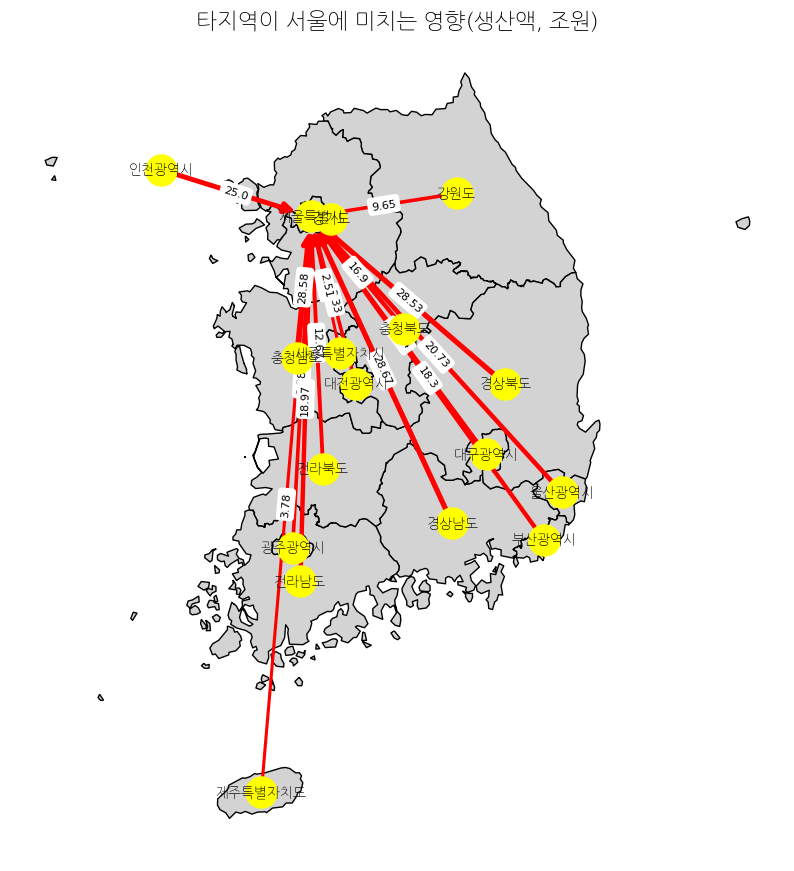

In [100]:
############################from other regions to Seoul #####################################
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 폰트 설정
rcParams['font.family'] = 'NanumGothicBold'
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', name='NanumGothicBold')  # 폰트 경로 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})  # 폰트 설정

# GeoJSON 데이터 파일 경로
geojson_file = "/content/TL_SCCO_CTPRVN.json"  # 한국 광역시도 경계 GeoJSON 파일 경로

# GeoJSON 데이터를 읽어오기
gdf = gpd.read_file(geojson_file)

# 중심 좌표 계산 및 추가 (각 광역시도의 중심)
gdf["lat"] = gdf.geometry.centroid.y
gdf["lon"] = gdf.geometry.centroid.x

# Matplotlib을 사용하여 기본 지도 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(ax=ax, color="lightgrey", edgecolor="black")

# HEM 계산결과 가져오기
Hem = pd.read_excel('/content/M_17_17.xlsx', sheet_name='조원')
adj_matrix = Hem.iloc[:, 1:]
regions = adj_matrix.columns

# NetworkX 그래프 생성 (양방향 그래프)
G = nx.DiGraph()  # DiGraph에서 Graph로 변경하여 양방향 간선 지원

# 노드 추가 (광역시도 이름과 중심 좌표)
for _, row in gdf.iterrows():
    G.add_node(row["CTP_KOR_NM"], pos=(row["lon"], row["lat"]))

# 간선 추가 (가중치 포함)
# 간선 추가 (방향 설정: 서울에서 다른 지역, 다른 지역에서 서울)
for i, source in enumerate(regions):
    for j, target in enumerate(regions):
        weight = adj_matrix.iloc[j, i].round(2)
        if weight > 0:
          # print(weight)
          # if source == "서울특별시" and target != "서울특별시":  # 서울에서 다른 지역으로
                # G.add_edge(source, target, weight=weight)
            if source != "서울특별시" and target == "서울특별시":  # 다른 지역에서 서울로
                G.add_edge(source, target, weight=weight)

# for i, target in enumerate(regions):
#     for j, source in enumerate(regions):
#       weight = adj_matrix.iloc[i, j].round(2)
#       if weight > 0:  # 가중치가 0보다 큰 경우에만 간선 추가
#         G.add_edge(source, target, weight=weight)

# 간선 두께 설정 (Weight 반영)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # 간선의 가중치
max_weight = max(weights) if weights else 1  # 최대 가중치 (안전성을 위해 1로 초기화)

# 간선 두께 설정 (가중치에 비례)
edge_widths = [2 + (weight / max_weight) * 8 for weight in weights]  # 두께 최소 2, 최대 10

# 노드 위치 가져오기
pos = nx.get_node_attributes(G, "pos")

# 노드 위치 가져오기 (spring_layout으로 위치 조정)
# pos = nx.spring_layout(G, seed=42, k=0.3)

# NetworkX 노드와 간선 지도 위에 그리기
nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    node_size=500,
    node_color="yellow",
    edge_color="red",
    font_size=10,
    font_family='NanumGothicBold',
    font_color="black",
    arrows = True,
    arrowsize=15,  # 화살표 크기 설정
    width=edge_widths  # 가중치에 따른 간선 두께 설정
)

# 간선에 가중치 라벨 추가
edge_labels = nx.get_edge_attributes(G, 'weight')  # 가중치 가져오기
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 제목 추가
plt.title("타지역이 서울에 미치는 영향(생산액, 조원)", fontsize=16)

# 저장
plt.savefig("/content/타지역이 서울에 미치는 영향.pdf", dpi=300, bbox_inches='tight')

# 시각화
plt.show()